In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krishujeniya/fitness-tracker-accelerometer-and-gyroscope-data")

print("Path to dataset files:", path)

100%|██████████| 223k/223k [00:00<00:00, 28.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/krishujeniya/fitness-tracker-accelerometer-and-gyroscope-data/versions/1


In [ ]:
df = pd.read_csv("01_Data_Processed.csv")
df.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30


In [ ]:
df.drop(columns=['epoch (ms)', 'Participants', 'Category', 'Set'], inplace=True)
df.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,bench
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,bench
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,bench
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,bench
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,bench


In [ ]:
df['Label'].unique()

array(['bench', 'ohp', 'squat', 'dead', 'row', 'rest'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
ohp,1676
bench,1665
squat,1610
dead,1531
row,1417
rest,1110


In [ ]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['Label'])
df.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Label,encoded_label
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,bench,0
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,bench,0
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,bench,0
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,bench,0
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,bench,0


In [ ]:
df['encoded_label'].unique()

array([0, 2, 5, 1, 4, 3])

In [ ]:
df.drop(columns=['Label'], inplace=True)
df.head()

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,encoded_label
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,0
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,0
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,0
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,0
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,0


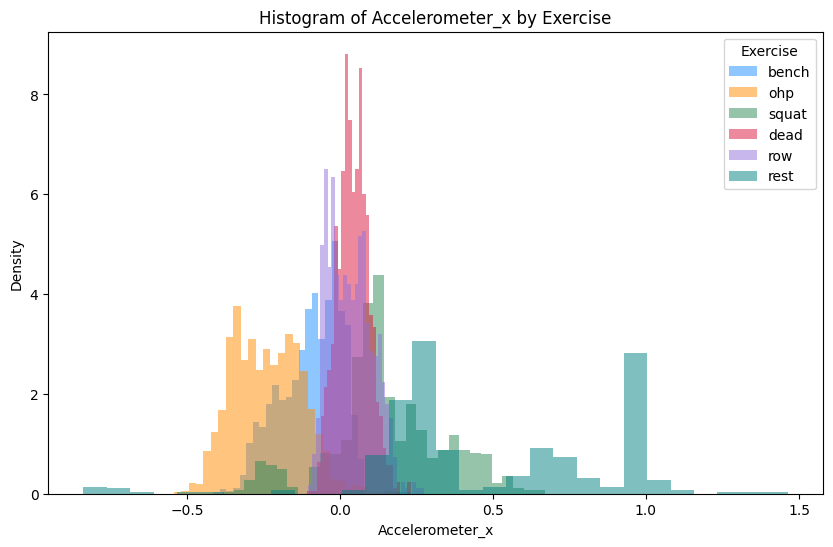

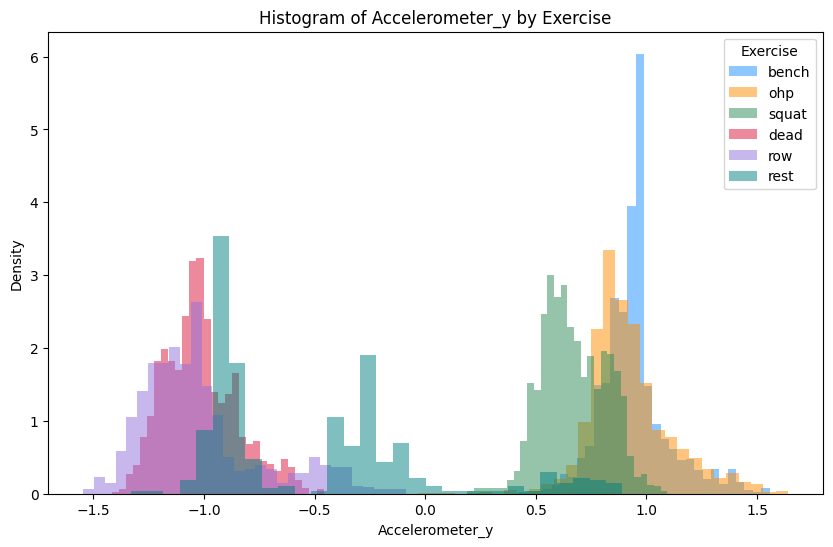

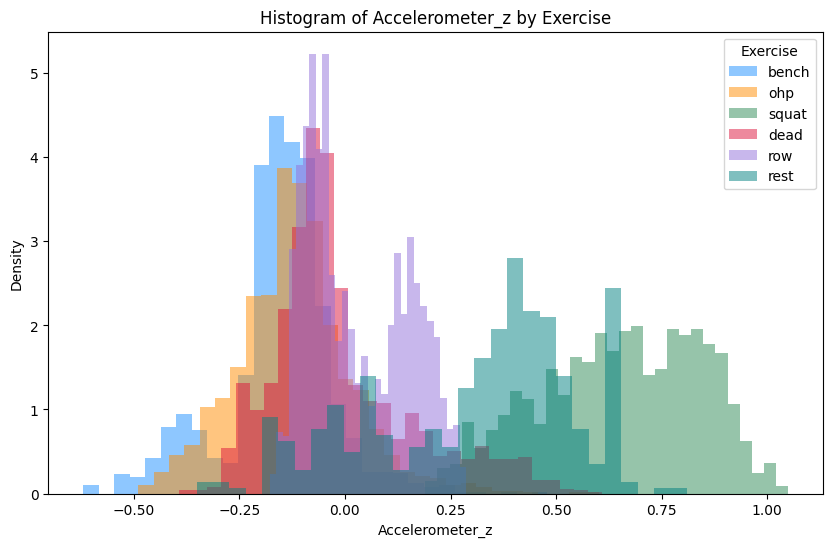

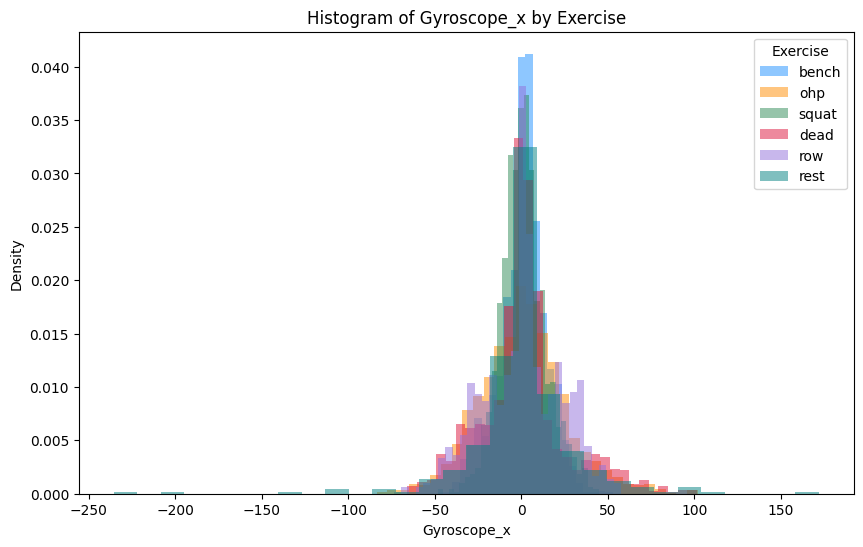

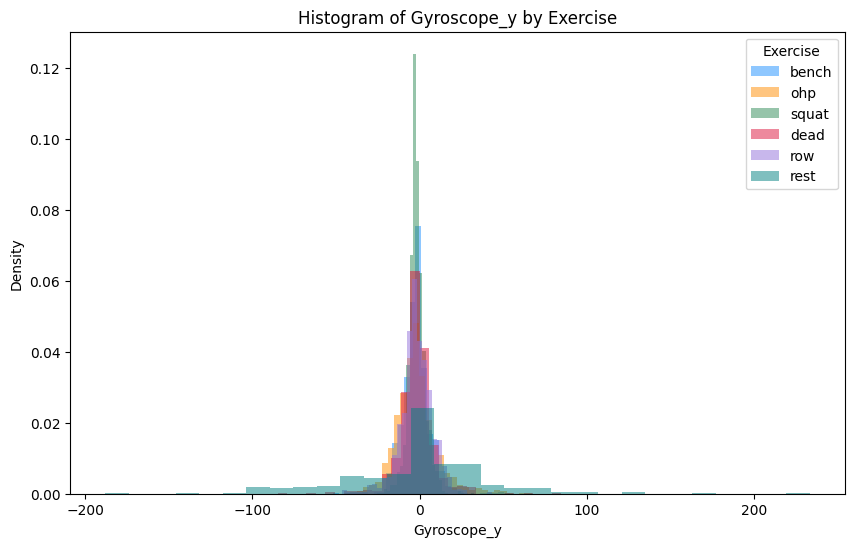

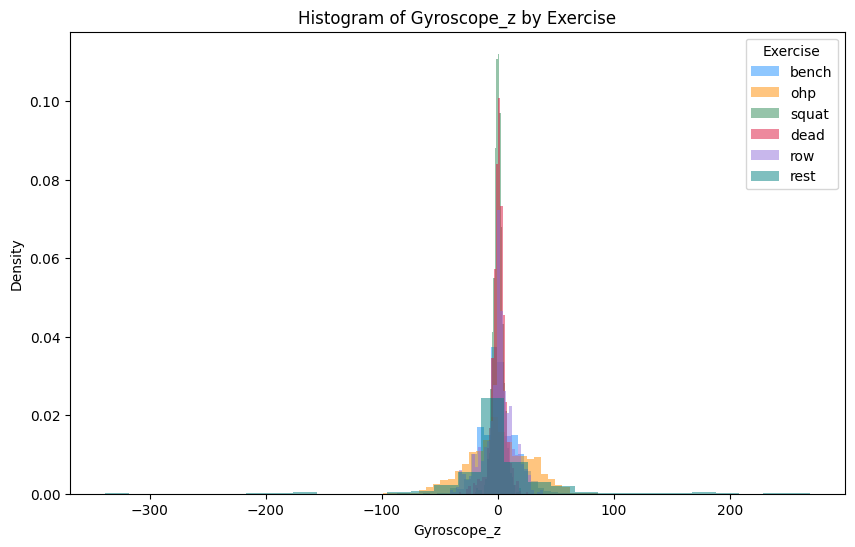

In [ ]:
# Define the sensor features and target column
features = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z',
            'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']
target = 'encoded_label'  # This column contains the encoded values

# Define the mapping from encoded labels to exercise names
label_mapping = {0: 'bench', 2: 'ohp', 5: 'squat', 1: 'dead', 4: 'row', 3: 'rest'}

# Define a custom color mapping for better visibility
color_mapping = {
    0: 'dodgerblue',
    2: 'darkorange',
    5: 'seagreen',
    1: 'crimson',
    4: 'mediumpurple',
    3: 'teal'
}

# Get the unique encoded labels from the DataFrame
exercises = df[target].unique()

# Loop through each feature and plot histograms for each exercise type
for feature in features:
    plt.figure(figsize=(10, 6))

    for exercise in exercises:
        # Filter the data for the current exercise
        exercise_data = df[df[target] == exercise][feature]
        # Use the mapping dictionary to get the exercise name and corresponding color
        exercise_name = label_mapping[exercise]
        exercise_color = color_mapping[exercise]

        # Plot histogram:
        # - bins: number of bins (adjust as needed)
        # - alpha: transparency so overlapping histograms are visible
        # - density: normalize the histogram to show density
        plt.hist(exercise_data, bins=30, alpha=0.5, density=True,
                 label=exercise_name, color=exercise_color)

    plt.title(f'Histogram of {feature} by Exercise')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title='Exercise')
    plt.show()

In [ ]:
def prepare_data(data, use_scaler=True, test_size=0.2, random_state=42):
    """
    Prepares the data by splitting into training and test sets, and optionally scaling the features.

    Parameters:
    - data (pd.DataFrame): DataFrame containing sensor features and the target column 'encoded_exercise'.
      Expected feature columns: ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
    - use_scaler (bool): Whether to scale the features using StandardScaler.
    - test_size (float): Proportion of the data to include in the test split.
    - random_state (int): Seed for reproducibility.

    Returns:
    - X_train: Training features (scaled if use_scaler is True).
    - X_test: Test features (scaled if use_scaler is True).
    - y_train: Training target.
    - y_test: Test target.
    - scaler: The fitted scaler if use_scaler is True; otherwise, None.
    """

    # Define feature and target columns
    feature_columns = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']
    target_column = 'encoded_label'

    # Extract features and target
    X = data[feature_columns]
    y = data[target_column]

    # Split the data with stratification to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    scaler = None
    if use_scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler

In [ ]:
X_train, X_test, y_train, y_test, scaler = prepare_data(df, use_scaler=True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = knn.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.9378468368479467
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       333
           1       0.94      0.93      0.93       306
           2       0.92      0.87      0.90       335
           3       0.99      0.98      0.98       222
           4       0.92      0.93      0.93       284
           5       0.99      1.00      1.00       322

    accuracy                           0.94      1802
   macro avg       0.94      0.94      0.94      1802
weighted avg       0.94      0.94      0.94      1802

